In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


# Diabetes Risk Prediction

## Objective
The goal of this project is to predict the **risk of diabetes** based on patient data, including demographics, medical history, and lifestyle factors.

## Dataset Overview
The dataset contains records of individuals with features relevant to diabetes risk assessment.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for diabetes risk.
4. **Model Training**: Train a classification model to predict diabetes risk.
5. **Evaluation**: Assess model performance using accuracy and classification reports.




Shape: (4240, 16)
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  


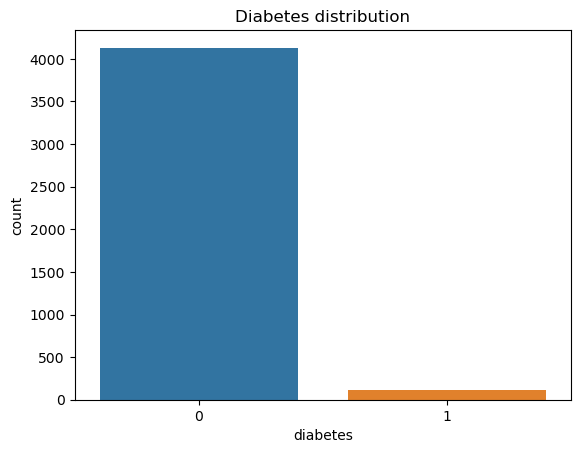

Accuracy: 0.9174528301886793
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       826
           1       0.21      0.82      0.34        22

    accuracy                           0.92       848
   macro avg       0.60      0.87      0.65       848
weighted avg       0.97      0.92      0.94       848



In [3]:
# 1. Load dataset
df = pd.read_csv("/Users/nikhilreddyponnala/Desktop/Data Analytics/Fourth Project/Diabetes Risk/Dataset/framingham.csv")
print("Shape:", df.shape)
print(df.head())

# 2. Explore dataset
print(df.info())
print(df['diabetes'].value_counts())

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Optional: visualize distribution of key features
sns.countplot(x='diabetes', data=df)
plt.title("Diabetes distribution")
plt.show()

# 3. Handle missing values (simple imputation for demo)
df.fillna(df.median(numeric_only=True), inplace=True)

# 4. Split features and target
X = df.drop(columns=['diabetes'])
y = df['diabetes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Train logistic regression
model = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# 6. Predictions & Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [4]:
# Display basic info about columns, datatypes, and missing values
print("Dataset Shape:", df.shape)
print("\n--- Info ---")
print(df.info())

print("\n--- First 5 rows ---")
print(df.head())

print("\n--- Summary statistics (numerical) ---")
print(df.describe())

print("\n--- Missing values per column ---")
print(df.isnull().sum())


Dataset Shape: (4240, 16)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64

Missing values per column:

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


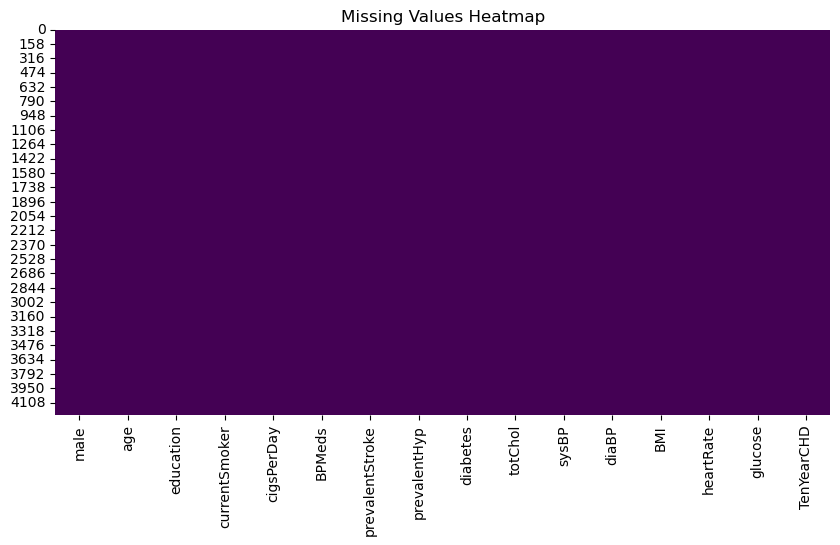

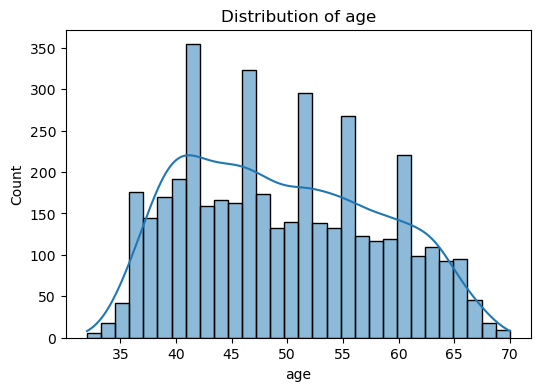

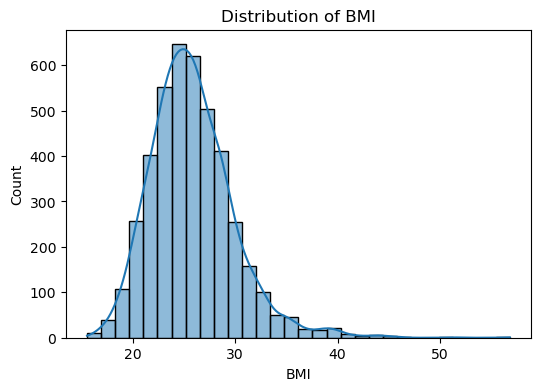

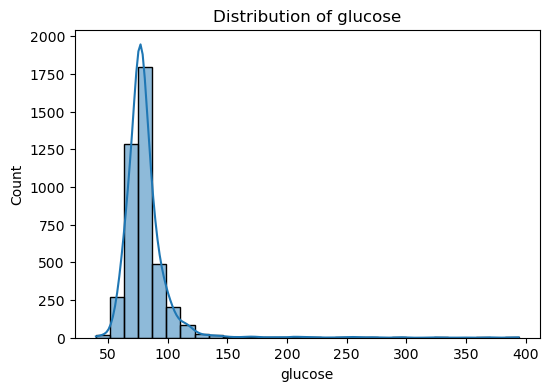

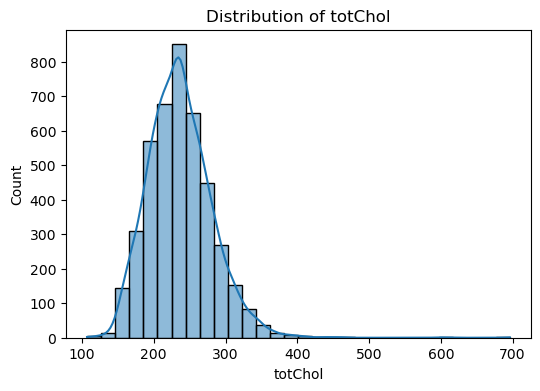

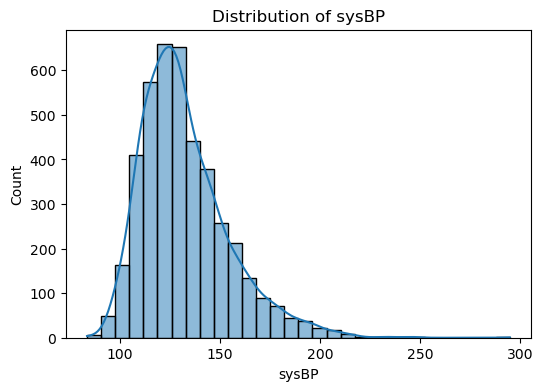

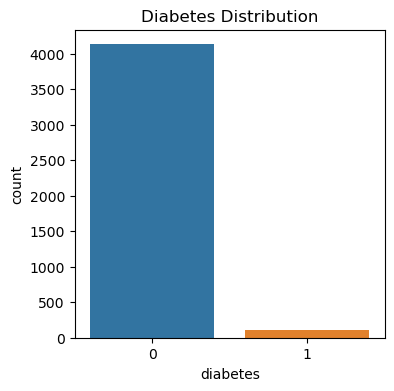

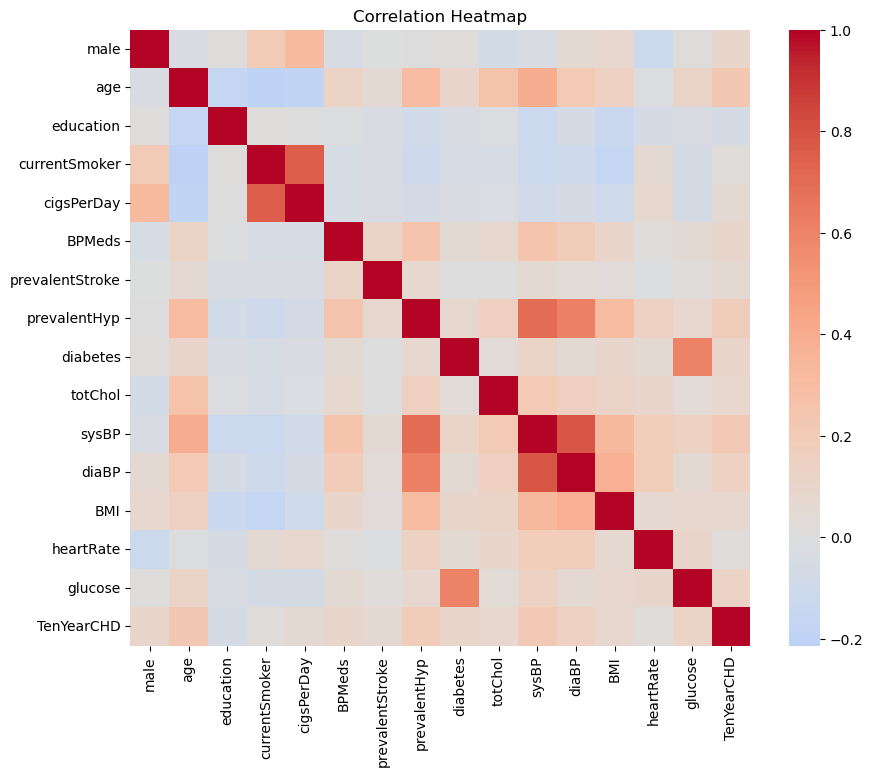


Top correlations with diabetes:
diabetes        1.000000
glucose         0.606495
sysBP           0.111265
age             0.101314
TenYearCHD      0.097344
BMI             0.086058
prevalentHyp    0.077752
BPMeds          0.051407
diaBP           0.050260
heartRate       0.048989
Name: diabetes, dtype: float64


In [5]:
## Exploratory Data Analysis (EDA)

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Check for missing values
print("Missing values per column:\n")
print(df.isnull().sum())

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# 2. Visualize key distributions
key_features = ["age", "BMI", "glucose", "totChol", "sysBP"]

for col in key_features:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

# Target variable distribution
plt.figure(figsize=(4,4))
sns.countplot(x="diabetes", data=df)
plt.title("Diabetes Distribution")
plt.show()

# 3. Correlation matrix (numerical features only)
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Look at correlations with diabetes specifically
if "diabetes" in df.columns:
    print("\nTop correlations with diabetes:")
    print(corr["diabetes"].sort_values(ascending=False).head(10))


Missing values per column:

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


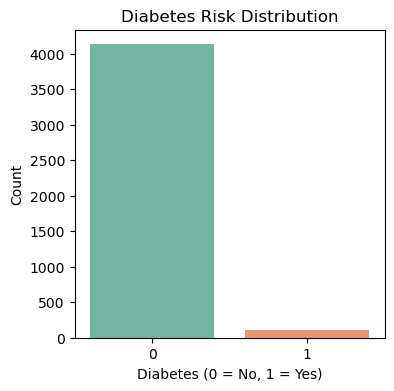

In [6]:
# Check for missing values
print("Missing values per column:\n")
print(df.isnull().sum())

# Visualize diabetes risk distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
sns.countplot(x="diabetes", data=df, palette="Set2")
plt.title("Diabetes Risk Distribution")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [7]:
## Data Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Separate features and target
X = df.drop(columns=["diabetes"])
y = df["diabetes"]

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric features:", num_cols)
print("Categorical features:", cat_cols)

# Pipelines for preprocessing
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),     # handle missing numeric values
    ("scaler", StandardScaler())                       # normalize
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), # fill missing categorical
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Numeric features: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
Categorical features: []
Train size: (3392, 15) Test size: (848, 15)


In [8]:
# Drop unnecessary columns (e.g., Patient ID if present)
if "PatientID" in df.columns:
    df = df.drop(columns=["PatientID"])

# Encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=["diabetes"])
y = df["diabetes"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (4240, 15)
Target shape: (4240,)


In [9]:
## Model Training - Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split into train and test sets (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize Logistic Regression with balanced class weights
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9174528301886793

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       826
           1       0.21      0.82      0.34        22

    accuracy                           0.92       848
   macro avg       0.60      0.87      0.65       848
weighted avg       0.97      0.92      0.94       848


Confusion Matrix:
 [[760  66]
 [  4  18]]
